Importing all important libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Getting overview of data

In [4]:
data=pd.read_csv('housedata.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Dataset dimensions and information needed for further exploration

In [6]:
data.shape

(545, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
data.isnull().sum().sum() #checking null values

0

In [9]:
data.duplicated().sum() #checking duplicated values

0

Exploratory Data Analysis

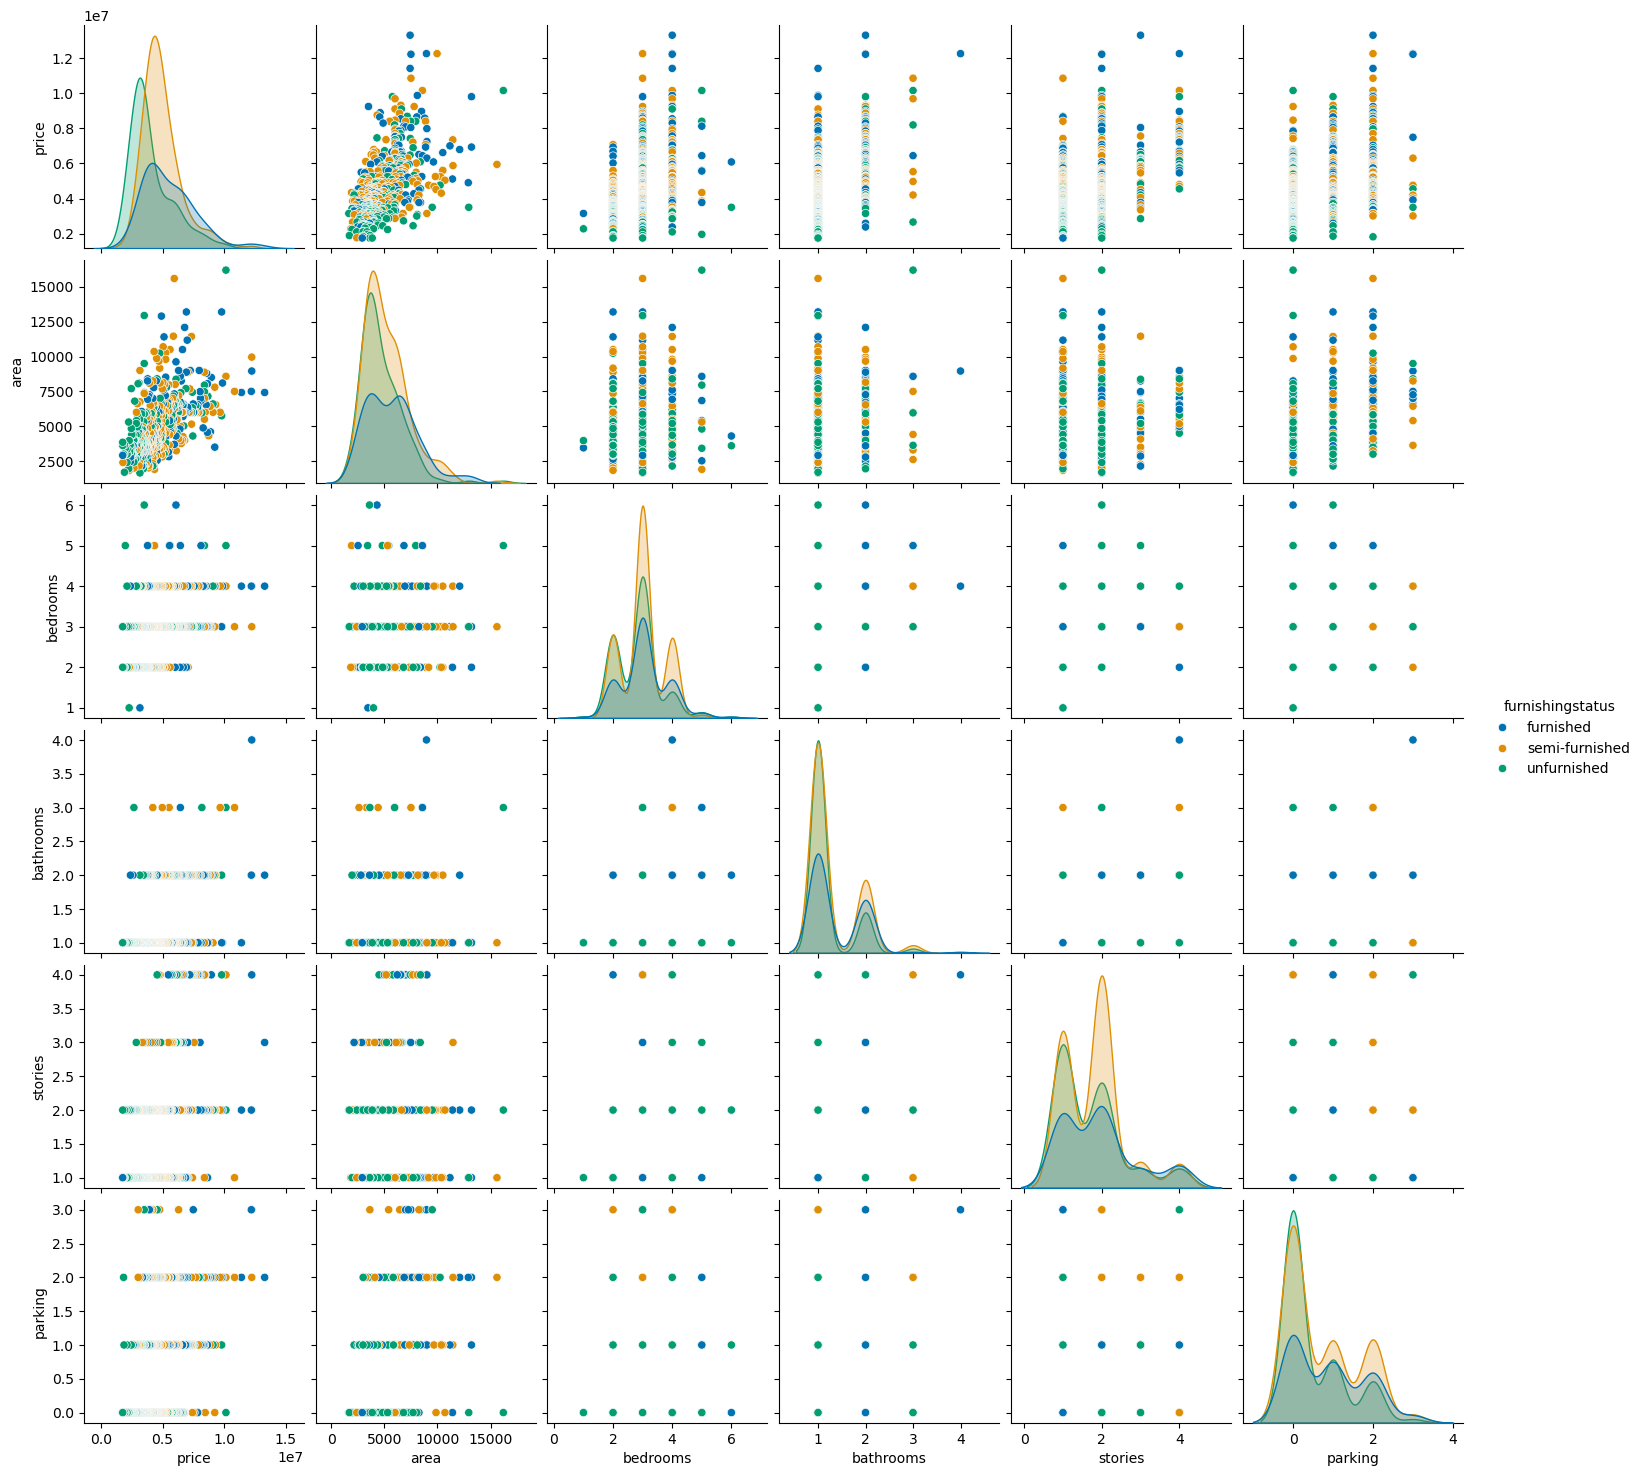

In [11]:
sns.pairplot(data=data,hue='furnishingstatus',palette='colorblind')
plt.show()

Checking columns which needed to be encoded

In [13]:
obj_col=data.select_dtypes(include='object')
obj_col_list=list(obj_col)
obj_col_list

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [14]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

Using label encoding 

In [16]:
le=LabelEncoder()
def label(data,columns):
  le = LabelEncoder()
  for column in columns:
    data[column] = le.fit_transform(data[column])
  return data

label(data, ['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus'])

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


Encoded Data now  ready to work

In [18]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


All the mathematical aspects of dataset to check if outlier present or not

In [20]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


Outlier detection using Boxplot

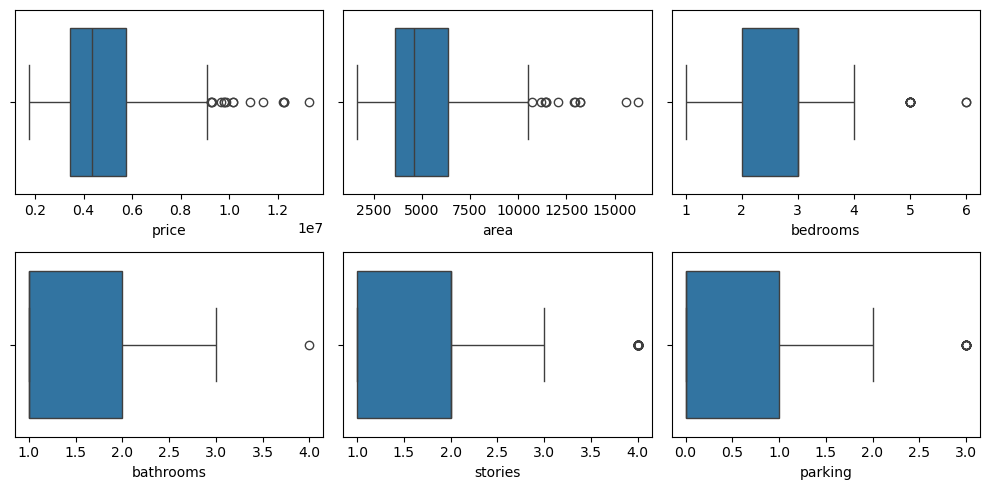

In [22]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=data['price'], ax = axs[0,0])
plt2 = sns.boxplot(x=data['area'], ax = axs[0,1])
plt3 = sns.boxplot(x=data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(x=data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(x=data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(x=data['parking'], ax = axs[1,2])
plt.tight_layout()

Outlier removal for column - price

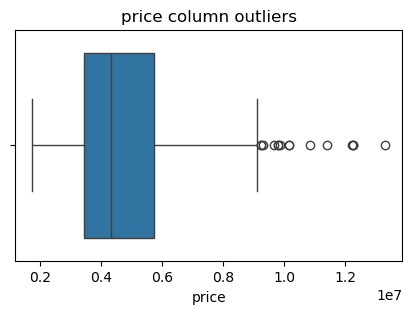

In [24]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data['price'])
plt.title('price column outliers')
plt.show()

Using IQR method 

In [26]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
min_range= Q1-(1.5*IQR)
max_range= Q3+(1.5*IQR)
IQR , min_range , max_range

(2310000.0, -35000.0, 9205000.0)

In [27]:
data = data[(data['price'] >= Q1 - 1.5*IQR) & (data['price']<= Q3 + 1.5*IQR)]

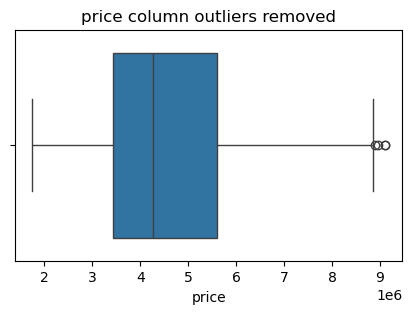

In [28]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data['price'])
plt.title('price column outliers removed')
plt.show()

Rechecking dataset dimensions

In [30]:
data.shape

(530, 13)

Removing outliers from area column

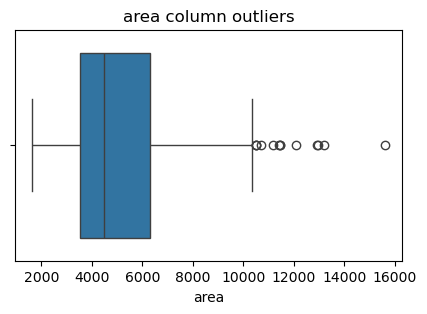

In [32]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data['area'])
plt.title('area column outliers')
plt.show()

In [33]:
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
min_range= Q1-(1.5*IQR)
max_range= Q3+(1.5*IQR)
IQR , min_range , max_range

(2768.25, -604.875, 10468.125)

In [34]:
data = data[(data['area'] >= Q1 - 1.5*IQR) & (data['area']<= Q3 + 1.5*IQR)]

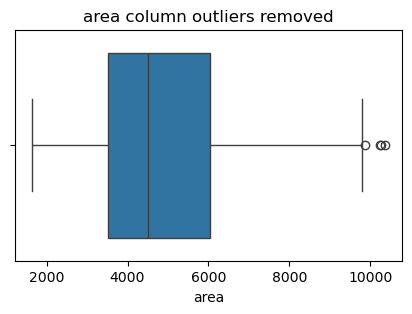

In [35]:
plt.figure(figsize=(5,3))
sns.boxplot(x=data['area'])
plt.title('area column outliers removed')
plt.show()

In [36]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [37]:
data.shape

(517, 13)

Outliet Analysis Completed

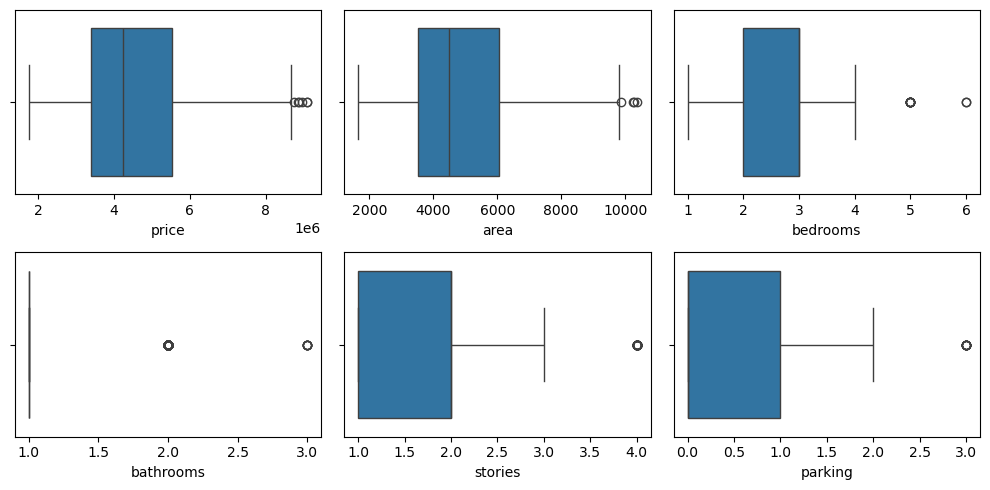

In [39]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=data['price'], ax = axs[0,0])
plt2 = sns.boxplot(x=data['area'], ax = axs[0,1])
plt3 = sns.boxplot(x=data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(x=data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(x=data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(x=data['parking'], ax = axs[1,2])

plt.tight_layout()

In [40]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,2
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,0
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,0
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,0


Checking correlation between data

<Axes: >

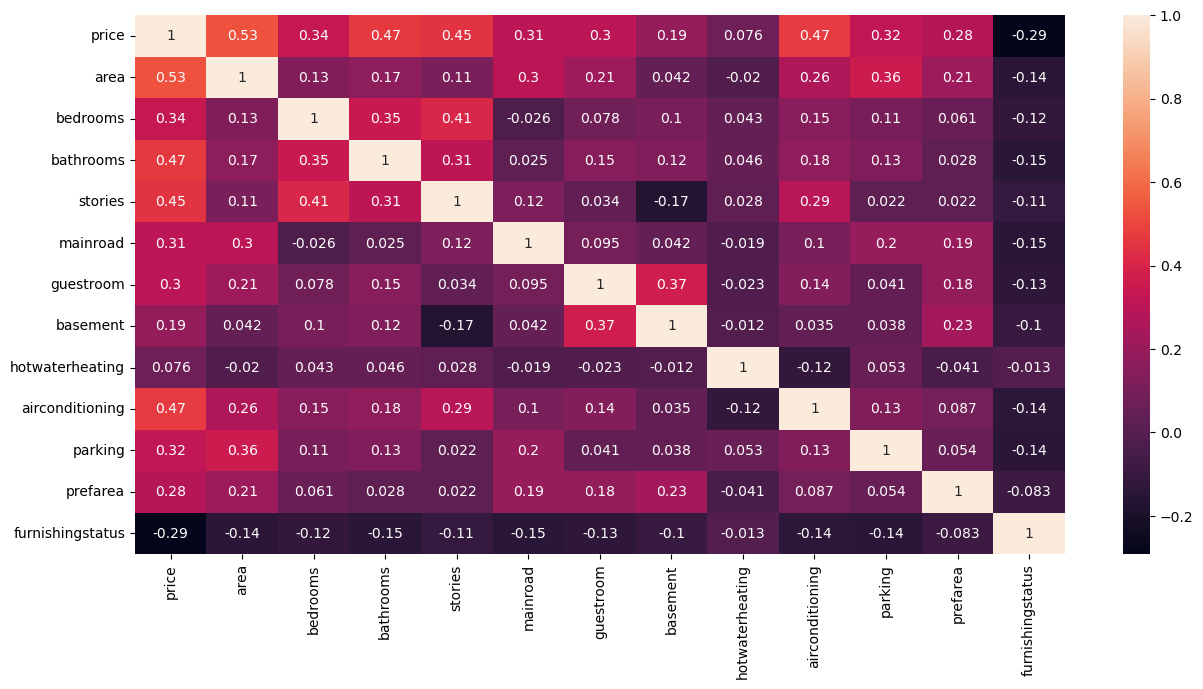

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

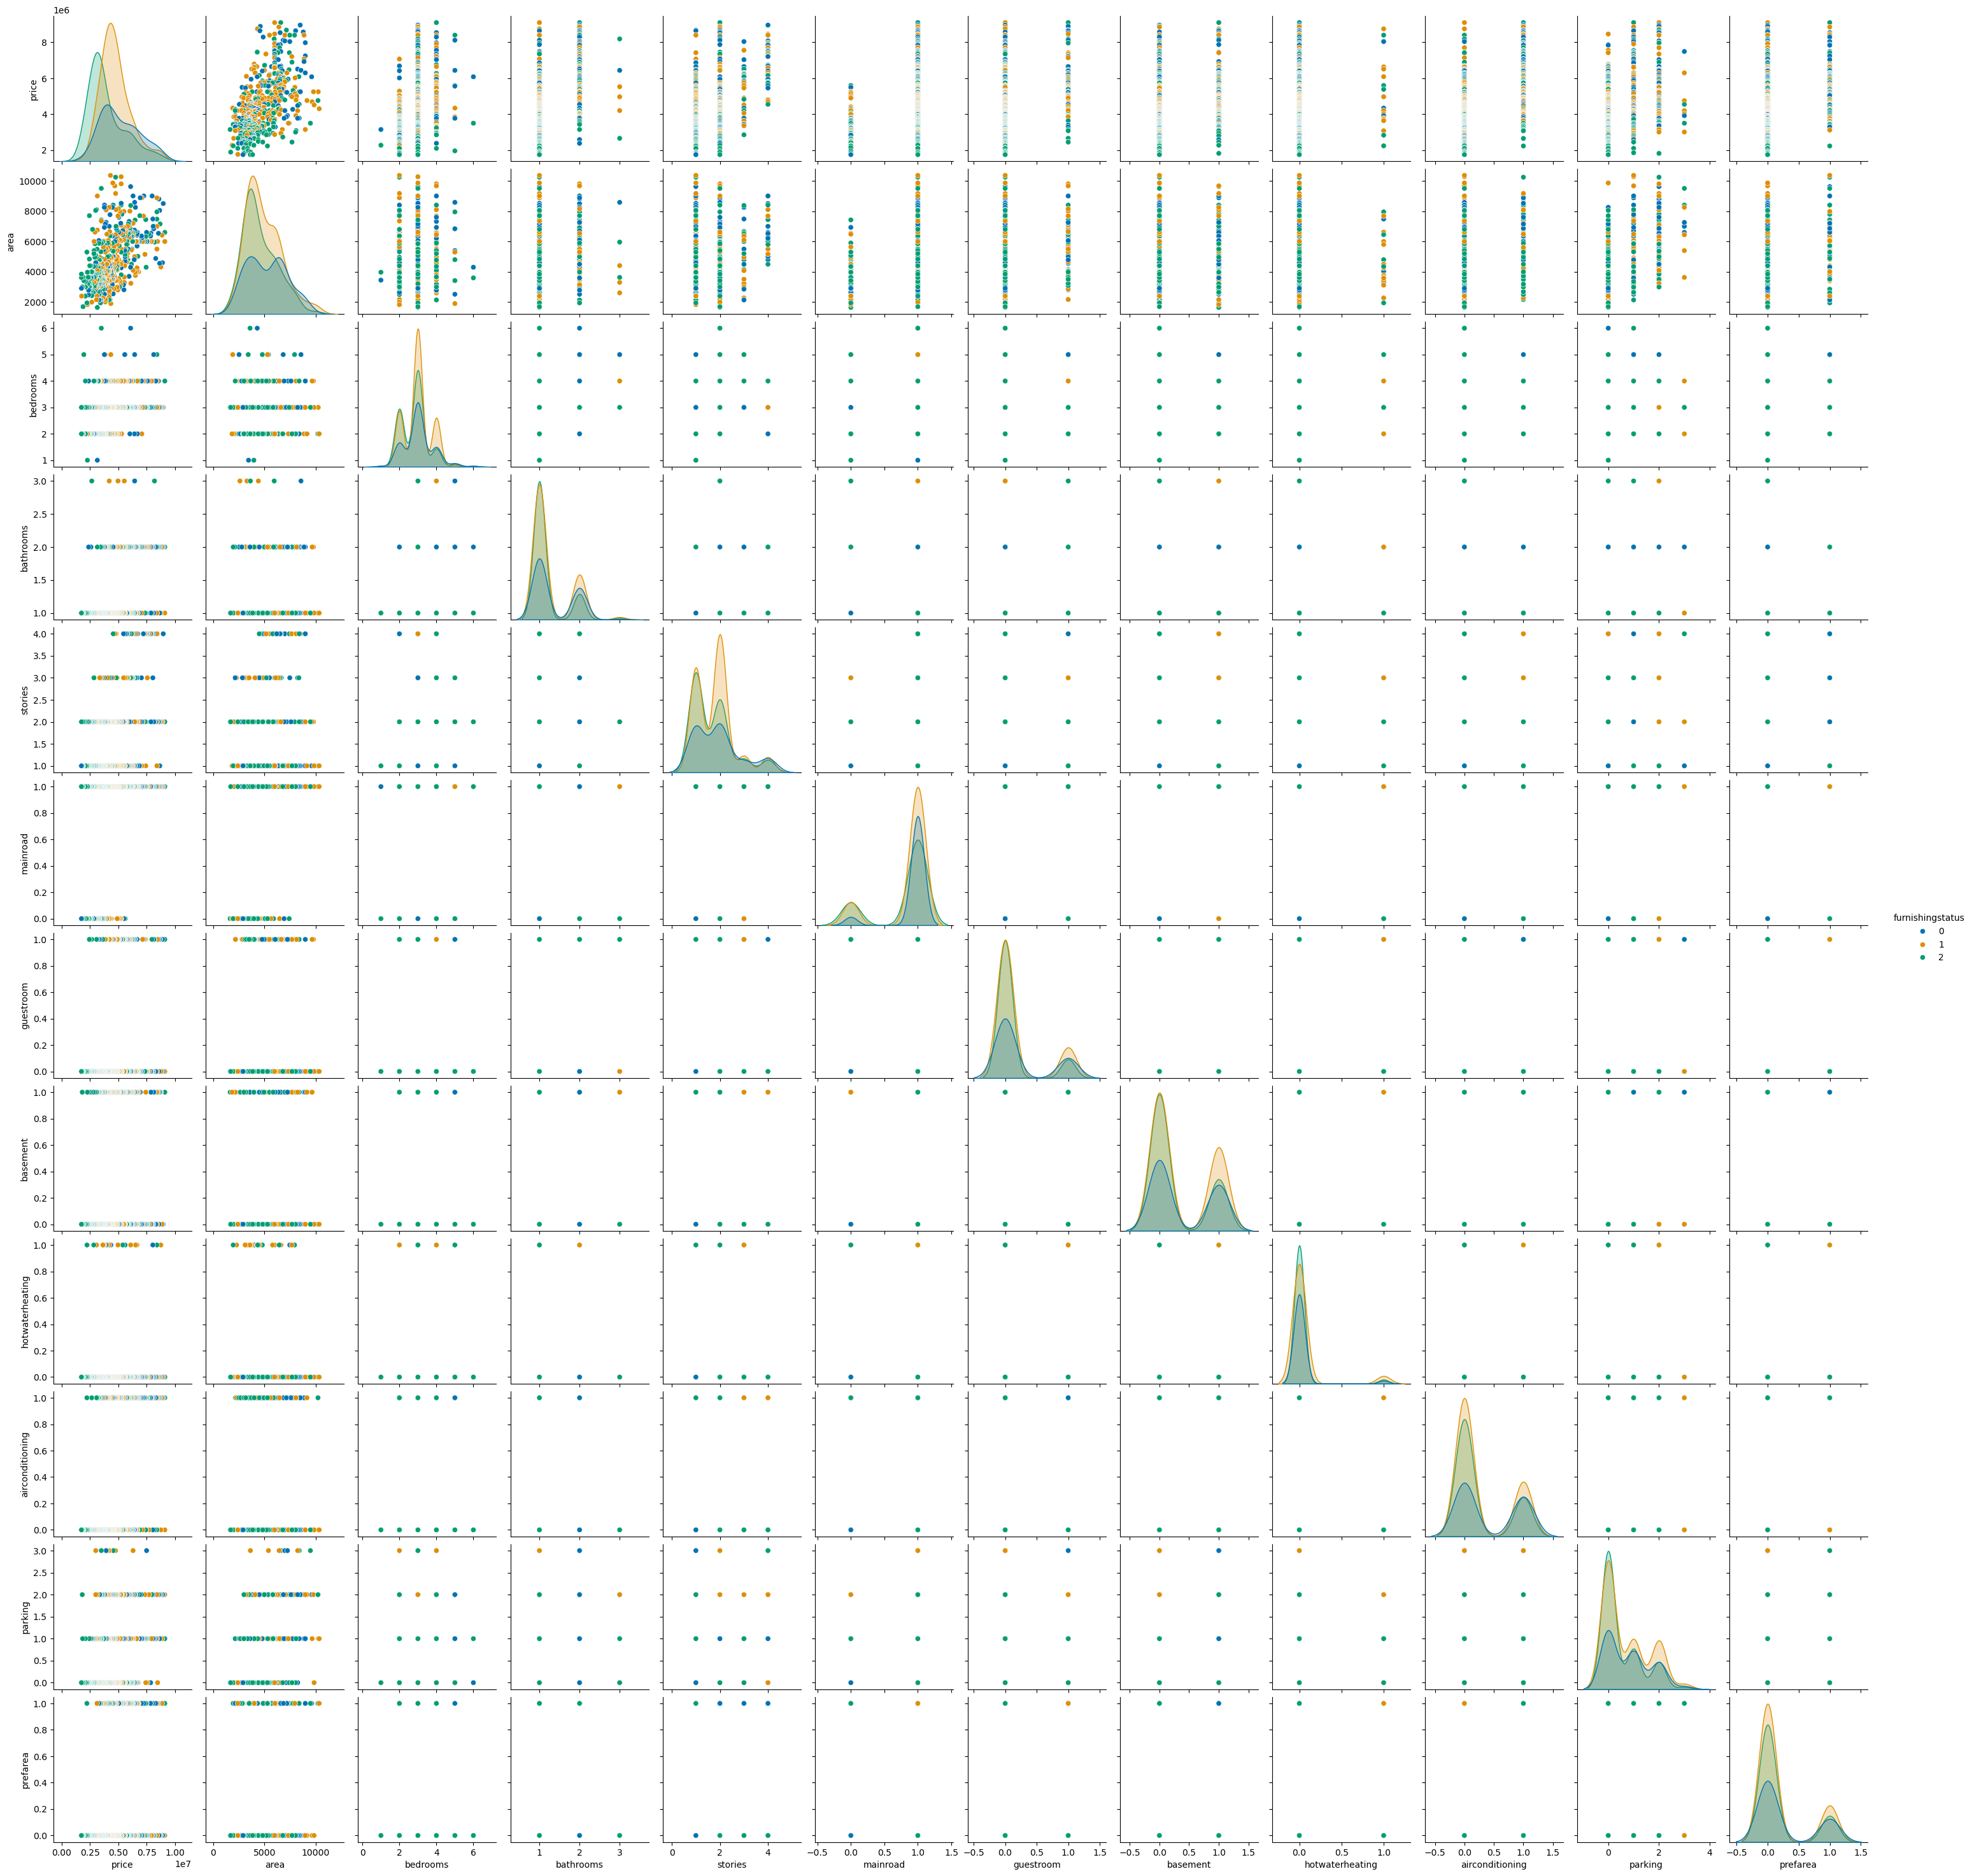

In [43]:
sns.pairplot(data=data,hue='furnishingstatus',palette='colorblind')
plt.show()

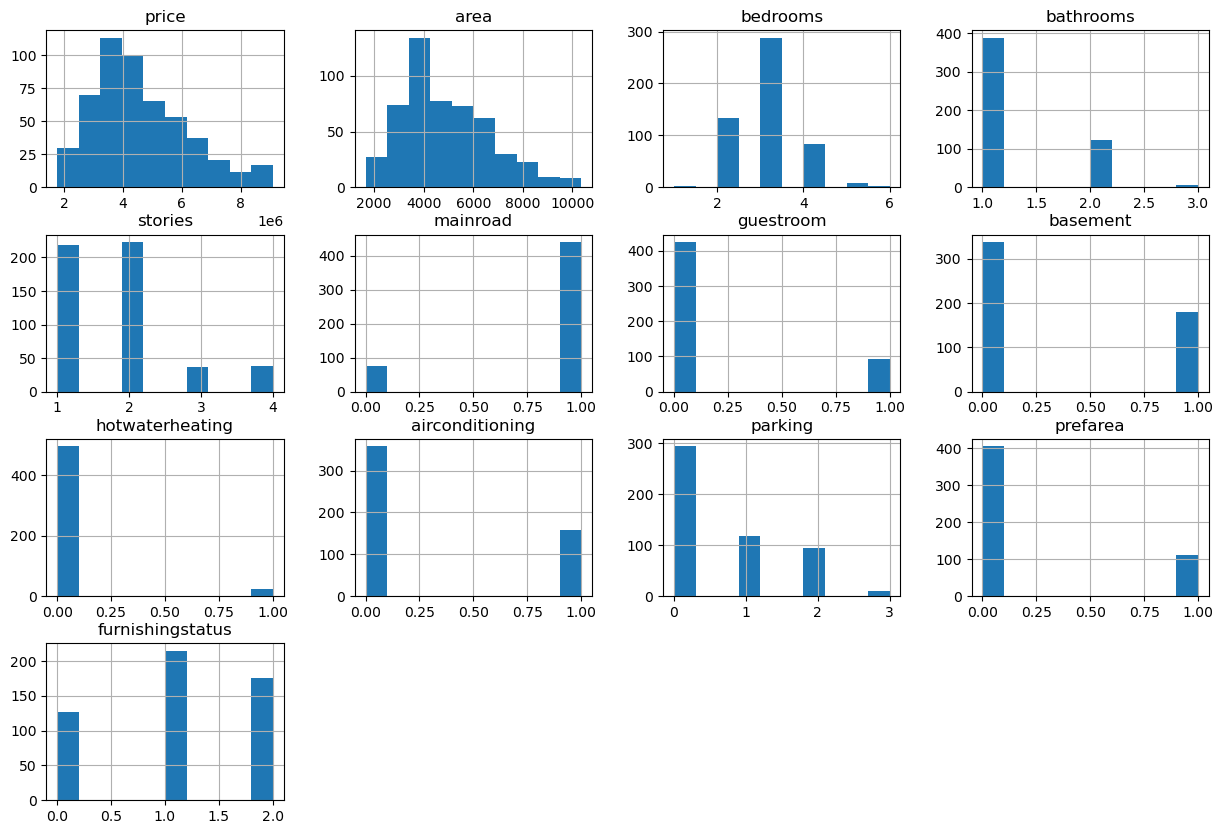

In [44]:
data.hist(figsize=(15,10))
plt.show()

Splitting data into independent and dependent features

In [46]:
x=data.iloc[:,1:]
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,6000,4,1,2,1,0,1,0,0,2,0,1
16,6600,4,2,2,1,1,1,0,1,1,1,2
17,8500,3,2,4,1,0,0,0,1,2,0,0
18,4600,3,2,2,1,1,0,0,1,2,0,0
19,6420,3,2,2,1,0,0,0,1,1,1,1


In [47]:
y=data['price']
y.head()

15    9100000
16    9100000
17    8960000
18    8890000
19    8855000
Name: price, dtype: int64

Splitting data for training and testing

In [49]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=20,random_state=90)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(497, 12)
(20, 12)
(497,)
(20,)


Scaling data for compressed dataset and better results

In [52]:
ms=MinMaxScaler()
ms.fit_transform(x_train)
ms.fit_transform([y_train])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

Using Random Forest algorithm 

In [54]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

Accuracy score for this model is 73%

In [56]:
rfr.score(x_test,y_test)*100

73.61758679476638

Scaling the test data set also

In [58]:
ms.fit_transform(x_test)
ms.fit_transform([y_test])


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

Predicting using the test data set

In [60]:
y_predict=rfr.predict(x_test)

In [61]:
y_predict

array([2988766.66666667, 4016670.        , 5708990.        ,
       3189287.5       , 3300360.        , 8173200.        ,
       3698513.        , 3613750.        , 3917340.        ,
       3545885.        , 6401080.        , 3380993.        ,
       4347630.        , 5372115.        , 4350115.        ,
       5859630.        , 3408825.        , 3625230.        ,
       3368260.        , 3819851.        ])

In [62]:
y_test

538    1890000
130    5866000
119    5950000
388    3500000
513    2485000
65     6930000
292    4200000
343    3850000
377    3640000
396    3500000
98     6293000
514    2485000
335    3920000
70     6790000
303    4200000
141    5652500
402    3500000
344    3850000
441    3220000
462    3080000
Name: price, dtype: int64

Comparison of test prediction and actual prediction 

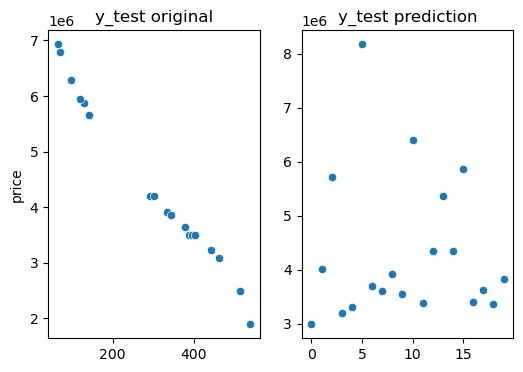

In [64]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.title('y_test original')
sns.scatterplot(y_test)
plt.subplot(1,2,2)
plt.title('y_test prediction')
sns.scatterplot(y_predict)
plt.show()